# MacGyver Literature Search
This is a fairly cursory literature search using SciXplorer to get a sense of the MacGyver Sessions in AGU Fall Meeting to date.

## Step 1: Initial Data Set
First, I used SciXplorer to generate a .bib file. This can be done using the standard stem format for AGU bibcodes (e.g., https://ui.adsabs.harvard.edu/search/fq=%7B!type%3Daqp%20v%3D%24fq_database%7D&fq_database=(database%3Aastronomy%20OR%20database%3Aphysics)&p_=0&q=2016AGUFM.H33E*&sort=date%20desc%2C%20bibcode%20desc)


## Read bibliography into pandas dataframe
Once references.bib has been populated, we can use this cell to read it into a pandas dataframe for our plots.

In [1]:
import pandas as pd
import bibtexparser

# Read the .bib file
with open('macgyver.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 

# Filter to just Fall Meeting abstracts:
df = df[df.booktitle == "AGU Fall Meeting Abstracts"]

df["Section Code"] = df["eid"].str.slice(0, 2).apply(lambda x: ''.join(y for y in x if not y.isdigit()))
lookup_df = pd.read_csv("AGU Sections.csv")
lookup_dict = lookup_df.set_index('Section Code')['Section'].to_dict()
# Map the values using the dictionary
df['Section'] = df["Section Code"].map(lookup_dict)
df = df.sort_values(by='Section')
df=df.drop_duplicates()
print(df.shape)
df.head()


(334, 17)


,adsnote,adsurl,pages,eid,month,volume,series,year,booktitle,keywords,title,author,ENTRYTYPE,ID,Year,Section Code,Section
0,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2013AGUFM.H4...,H43H-1579,H43H-1579,December,2013,AGU Fall Meeting Abstracts,2013,AGU Fall Meeting Abstracts,"1800 HYDROLOGY, 1806 HYDROLOGY Chemistry of fr...",{Development and evaluation of a water level p...,"{Schneider}, P. and {Lange}, A. and {Doppler}, T.",inproceedings,2013AGUFM.H43H1579S,2013,H,Hydrology
283,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2017AGUFM.H4...,H41J-1583,H41J-1583,December,2017,AGU Fall Meeting Abstracts,2017,AGU Fall Meeting Abstracts,"3394 Instruments and techniques, ATMOSPHERIC P...","{Development of an Open Source, Air-Deployable...","{Krejci}, A. and {Lopez Alcala}, J.~M. and {Ne...",inproceedings,2017AGUFM.H41J1583K,2017,H,Hydrology
282,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2017AGUFM.H4...,H41J-1599,H41J-1599,December,2017,AGU Fall Meeting Abstracts,2017,AGU Fall Meeting Abstracts,"3394 Instruments and techniques, ATMOSPHERIC P...",{Early results from the Array of Things},"{Jacob}, R.~L. and {Catlett}, C. and {Beckman}...",inproceedings,2017AGUFM.H41J1599J,2017,H,Hydrology
281,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2017AGUFM.H4...,H41J-1585,H41J-1585,December,2017,AGU Fall Meeting Abstracts,2017,AGU Fall Meeting Abstracts,"3394 Instruments and techniques, ATMOSPHERIC P...",{Low-cost embedded systems for democratizing o...,"{Glazer}, B.~T. and {Lio}, H.~I.",inproceedings,2017AGUFM.H41J1585G,2017,H,Hydrology
280,Provided by the SAO/NASA Astrophysics Data System,https://ui.adsabs.harvard.edu/abs/2017AGUFM.H4...,H41J-1579,H41J-1579,December,2017,AGU Fall Meeting Abstracts,2017,AGU Fall Meeting Abstracts,"3394 Instruments and techniques, ATMOSPHERIC P...",{EnviroDIY ModularSensors: A Library to give E...,"{Aufdenkampe}, A.~K. and {Damiano}, S.~G. and ...",inproceedings,2017AGUFM.H41J1579A,2017,H,Hydrology


# Bar Chart Visualization
I'd like to have the abstract titles be included in the hypergram. Let's see if we can make that happen.

In [2]:
df.columns


Index(['adsnote', 'adsurl', 'pages', 'eid', 'month', 'volume', 'series',
       'year', 'booktitle', 'keywords', 'title', 'author', 'ENTRYTYPE', 'ID',
       'Year', 'Section Code', 'Section'],
      dtype='object')

In [3]:
df.adsurl[4]

'https://ui.adsabs.harvard.edu/abs/2013AGUFM.H43H1575L'

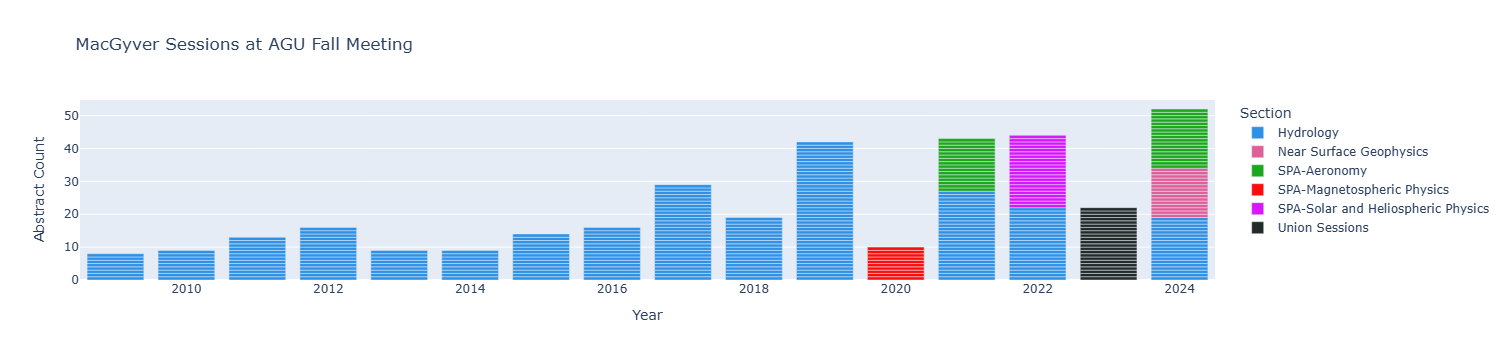

In [4]:
# AGU Fall Meeting 

import plotly.graph_objects as go
import plotly.express as px
import pandas as pd


titlestring = "MacGyver Sessions at AGU Fall Meeting"
# data
# Read the .bib file
with open('macgyver.bib', 'r') as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file)

# Convert to DataFrame
df = pd.DataFrame(bib_database.entries)

# Data handling:
df['Year'] = pd.to_numeric(df['year']) # Cast to numeric 
df['Abstract Count'] = 1 # for bar chart purposes
# Remove curly braces using str.replace()
df['title'] = df['title'].str.replace(r'[{}]', '', regex=True)
df['title'] = df['title'].str.replace(r'[/]', '', regex=True)
df['title'] = df['title'].str.replace(r'[\"]', '', regex=True)
df['author'] = df['author'].str.replace(r'[{}]', '', regex=True)
df['author'] = df['author'].str.replace(r'[~]', '', regex=True)

# Wrap the text and replace newlines with <br>
df['wrapped_author'] = df['author'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["author"] = df["wrapped_author"]
df['wrapped_title'] = df['title'].fillna('').str.wrap(50).apply(lambda x: x.replace('\n', '<br>'))
df["title"] = df["wrapped_title"]


# Filter to just Fall Meeting abstracts:
# df = df[df.booktitle == "AGU Fall Meeting Abstracts"]

df["Section Code"] = df["eid"].str.slice(0, 2).apply(lambda x: ''.join(y for y in x if not y.isdigit()))
lookup_df = pd.read_csv("AGU Sections.csv")
lookup_dict = lookup_df.set_index('Section Code')['Section'].to_dict()
# Map the values using the dictionary
df['Section'] = df["Section Code"].map(lookup_dict)
df = df.sort_values(by='Section')
df.shape

fig = px.bar(df, x='Year', y = 'Abstract Count', color='Section',
            color_discrete_sequence=px.colors.qualitative.Dark24,
            title = titlestring,
            hover_name = "title",
            hover_data={"author": True, "eid": True, "adsurl": True, "Abstract Count": False})#"adsurl"})
# fig.data[-1].text = sums

fig.update_traces(textposition='inside')
fig.show()
fig.write_html("plots/"+titlestring +" Histogram_Labeled.html")